In [1]:
from __future__ import print_function

import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.datasets import imdb
from keras.utils import plot_model, pad_sequences
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
#
# Get data
#
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
test_data = x_test
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
#print(x_train[450])

print('Pad sequences (samples x time)')
x_train = tf.keras.preprocessing.sequence.pad_sequences(sequences=x_train, maxlen=800)
x_test =  tf.keras.preprocessing.sequence.pad_sequences(sequences=x_test, maxlen=800)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Build model...')
model = Sequential()

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 800)
x_test shape: (25000, 800)
Build model...


In [3]:
#
# prepeare model
#
model.add(Embedding(input_dim=10000, output_dim=100, input_length=800))
model.add(Dropout(0.5))
model.add(Conv1D(filters=250, kernel_size=3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])              

In [7]:
model.summary()
#SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 800, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 798, 250)          75250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                        

In [8]:
#
# Training
#
history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test))
history_dict = history.history
history_dict.keys()

Epoch 1/2
782/782 [==============================] - 81s 104ms/step - loss: 0.3712 - accuracy: 0.8330 - val_loss: 0.2868 - val_accuracy: 0.8797
Epoch 2/2
782/782 [==============================] - 87s 112ms/step - loss: 0.2419 - accuracy: 0.9055 - val_loss: 0.2772 - val_accuracy: 0.8809


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
#
# evaluation
#
results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

782/782 [==============================] - 15s 19ms/step - loss: 0.2772 - accuracy: 0.8809
Accuracy on test set: [0.2772420644760132, 0.8809199929237366]
Test loss: 0.2772420644760132
Test accuracy: 0.8809199929237366


C:\Users\crist\AppData\Local\Temp\ipykernel_3488\4259918040.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
C:\Users\crist\AppData\Local\Temp\ipykernel_3488\4259918040.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
C:\Users\crist\AppData\Local\Temp\ipykernel_3488\4259918040.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training acc', color='red')
C:\Users\crist\AppData\Local\Temp\ipykernel_3488\4259918040.py:22: UserWarning: color is redundantly de

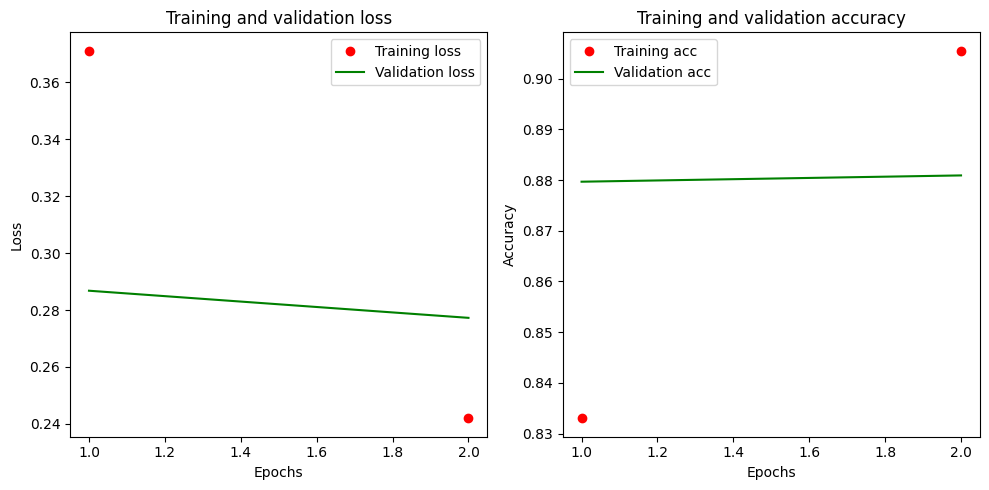

In [11]:
#
# Plot
#
val_loss = history.history['val_loss']
loss = history.history['loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
#
# PREDICTION
#
model_prediction = Sequential()
model_prediction.add(Embedding(10000, 50, input_length=800))
model_prediction.add(Dropout(0.5))
model_prediction.add(Conv1D(filters=250, kernel_size=3, padding='valid', activation='relu', strides=1))
model_prediction.add(GlobalMaxPooling1D())
model_prediction.add(Dense(250))
model_prediction.add(Activation('relu'))
model_prediction.add(Dense(1))
model_prediction.add(Activation('sigmoid'))
model_prediction.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 800, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 798, 250)          75250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                        

In [14]:
#
# training
#
history = model_prediction.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
782/782 [==============================] - 56s 71ms/step - loss: 0.4415 - accuracy: 0.7720 - val_loss: 0.2876 - val_accuracy: 0.8807
Epoch 2/3
782/782 [==============================] - 56s 72ms/step - loss: 0.2623 - accuracy: 0.8933 - val_loss: 0.2631 - val_accuracy: 0.8907
Epoch 3/3
782/782 [==============================] - 56s 72ms/step - loss: 0.2109 - accuracy: 0.9176 - val_loss: 0.2871 - val_accuracy: 0.8783


In [15]:
#
# Evaluation
#
results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

782/782 [==============================] - 14s 17ms/step - loss: 0.2772 - accuracy: 0.8809
Accuracy on test set: [0.2772420644760132, 0.8809199929237366]
Test loss: 0.2772420644760132
Test accuracy: 0.8809199929237366


782/782 [==============================] - 9s 12ms/step


(array([10314.,  1452.,   891.,   752.,   663.,   673.,   722.,   974.,
         1607.,  6952.]),
 array([3.21550579e-05, 1.00011609e-01, 1.99991077e-01, 2.99970537e-01,
        3.99949998e-01, 4.99929428e-01, 5.99908888e-01, 6.99888349e-01,
        7.99867809e-01, 8.99847269e-01, 9.99826729e-01]),
 <BarContainer object of 10 artists>)

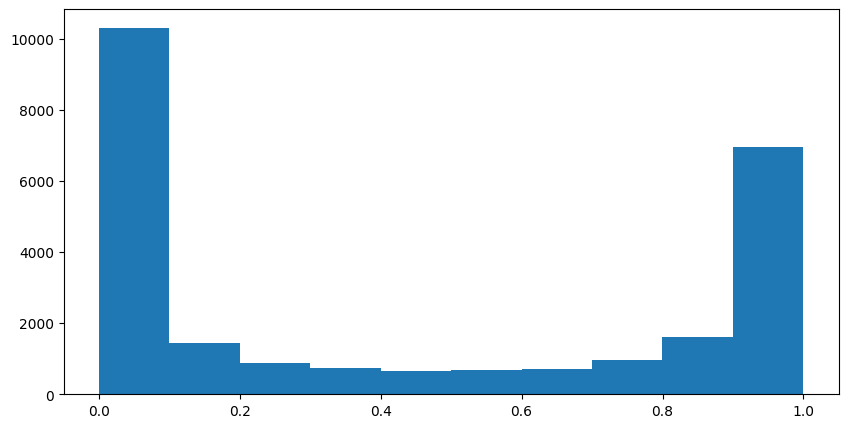

In [16]:
#
# Plot
#
plt.hist(model_prediction.predict(x_test))

In [17]:
#
# Prediction
#
y_pred = model_prediction.predict(x_test)
prediction_is_positive = y_pred > 0.5
label_is_negative = y_test.reshape((25000,1)) == 0

incorrect_cases = np.where(np.logical_and( prediction_is_positive  , label_is_negative ))[0]
#print ("All incorrect cases: ",incorrect_cases[0:])
print ("Predicted score: ", len(incorrect_cases))

782/782 [==============================] - 9s 12ms/step
Predicted score:  735
